In [2]:
from src.predict import predict
from src.gradient_descent import descent
from src.compute_cost import cost_function
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython import get_ipython


In [3]:
from IPython import get_ipython


  # City Profit

  First, we'll import the required libraries:

  Matplotlib will be used in plotting graphs.

  Pandas and Numpy will be used for data handling and data operations

In [4]:
get_ipython().run_line_magic('matplotlib', 'inline')


  Next, we'll create our dataframe and peek at the top  5 entries in our dataset

In [5]:
df = pd.read_csv('data/data.txt', names=['City Population', 'Profit'])
df.head()


,City Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


  Using matplotlib, we'll use plt.scatter to visualize each data entry as individual points.

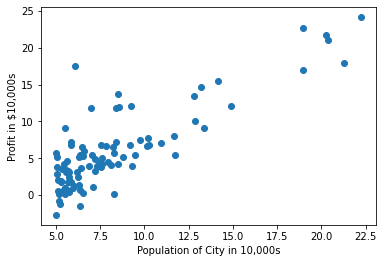

In [6]:
# Read our X values and Y values
df_x, df_y = df.iloc[:, 0], df.iloc[:, 1]

# Visualize data
fig, ax = plt.subplots()
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
ax.scatter(df_x, df_y)



In [7]:
# Set up all variables in 1 cell
m = len(df)
X = df_x.to_numpy()
Y = df_y.to_numpy()


# Will be used for gradient descent
alpha = 0.01
iterations = 500


  Next, we'll add i
 n a 1's column to our X features. This 1 is needed for the X-intercept.

In [8]:
# Add in 1 columns for X-intercept
X_1 = np.c_[np.ones(m), X]


  To compute for the cost function, we created a *cost_function* in compute_cost.py
  ```python
  def cost_function(X: np.array, Y: np.array, theta: np.array, alpha):
      m = len(Y)
      h = X.dot(theta)
      return ((h - Y) ** 2).sum() / (2 * m)
  ```
  We'll now call this function, to confirm JCost is working we'll call it using a initial theta=\[0, 0\]

  The expected result should be 32.07

In [9]:
# Initial theta values
theta = np.zeros(2)
print(cost_function(X_1, Y, theta, alpha))


32.072733877455676


  Since our JCost is functioning correctly, we'll now proceed with Gradient Descent

  Using the gradient_descent.py, we'll import the *descent* function
 ```python
  def descent(X: np.array, Y: np.array, theta: np.array, alpha):
      m = len(Y)
      h = X.dot(theta)
      theta = theta - (X.transpose().dot(h - Y) * (alpha / m))
 ```
  We can now use this descent function to minimize our JCost for a certain number of iterations. To see this, we'll store every value of JCost in each iteration in JHistory

In [10]:
theta = np.zeros(2)
j_hist = []
theta_hist = [theta]
for i in range(iterations):
    j_hist.append(cost_function(X_1, Y, theta, alpha))
    theta = descent(X_1, Y, theta, alpha)
    theta_hist.append(theta)

print("Training done!")



Training done!


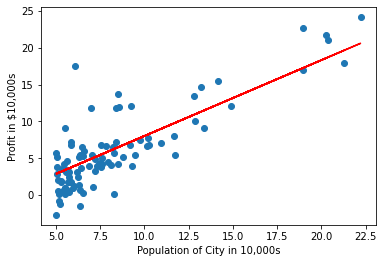

In [11]:
ax.plot(X, X_1.dot(theta), 'r')
fig

 ## Predicting Profit
 We can know predict the profit using the computed theta
 Using the helper script predict, we can input any number of City Population and get our prediction, the script automatically normalizes the value to fit the prediction
 ```python
 def predict(population, theta):
     # Normalize given population
     population /= 10000
     x = np.array([1, population])
     return x.transpose().dot(theta) * 10000
 )
 ```

The predicted profit for City with population 2075000:
$2,116,494.21


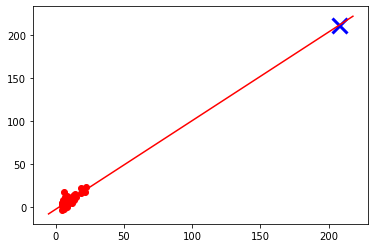

In [15]:
# Feel free to play with this cell to input any population
population = 75000
p = predict(population, theta)
print(f'The predicted profit for City with population {population}:\n${p:,.2f}')

# Plot the result in respect with linear prediction
res_fig, res_ax = plt.subplots()
x, y = population/10000, p/10000
res_ax.plot(x, y, 'bx', mew=3, ms=15)
res_ax.scatter(df_x, df_y, c='r')
x_lim = res_ax.get_xlim()
x_lim_1 = np.c_[np.ones(len(x_lim)), np.array(x_lim)]
y_lim = x_lim_1.dot(theta)
res_ax.plot(x_lim, y_lim, 'r')
